# Exploring Data

You have a data set and you want to do some exploratory data analysis. The dataset we use in this example is the `titanic` set which contains information about the pasengers of the titanic.

## Reading the data

To read the data from a csv file we use the `read_csv()` funciton from the [`pandas`](https://pandas.pydata.org/) package.

In [3]:
import pandas as pd

titanic_df = pd.read_csv("../datasets/titanic_train.csv")

Some usefull functions for a quick exploration are:
- `head()` shows you the first 5 rows
- `info()` shows the missing values per variable
- `describe()` shows some basic statistics for all the numaric variables

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization with Matplotlib

Importing the Matplotlib package is by convention done in the following way.

In [7]:
import matplotlib.pyplot as plt

To be able to display the plots in a notebook we need to use:

- `%matplotlib inline` for static images
- `%matplotlib notebook` for interactive images

In [8]:
%matplotlib inline

### One Variable

When exploring one variable a histogram is the most useful graph.

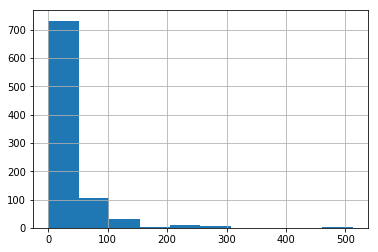

In [9]:
titanic_df['Fare'].hist()

### Two Variables: continues and continues

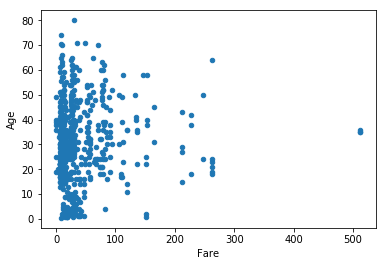

In [10]:
titanic_df.plot(kind='scatter', x='Fare', y='Age')

But the `matplotlib` library can not work well with `DataFrames`. To be able to do that and have more options we will use the [`seaborn`](https://seaborn.pydata.org/) library. This library is built on top of `matplotlib` so everything that you do in `seaborn` could be done in `matplotlib` as well, it just requires a lot less code.

## Visualization with Seaborn

Using the `set()` function the style of plots created using `matplotlib` is changed to look a bit more modern.

In [11]:
import seaborn as sns
sns.set()

### One Variable

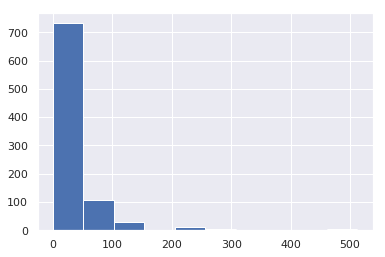

In [12]:
titanic_df['Fare'].hist()

/home/wim/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


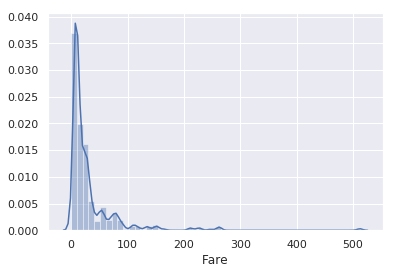

In [13]:
sns.distplot(titanic_df['Fare'])

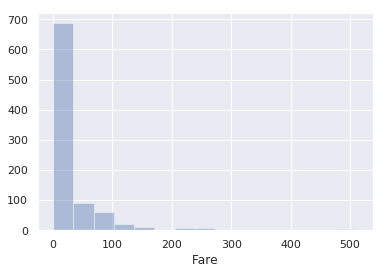

In [14]:
sns.distplot(titanic_df['Fare'], bins=15, kde=False)

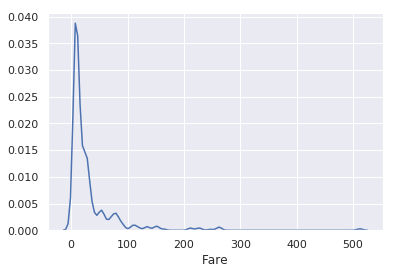

In [15]:
sns.distplot(titanic_df['Fare'], bins=15, hist=False)

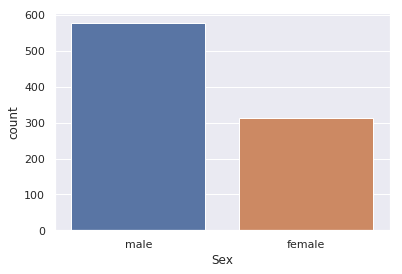

In [63]:
sns.countplot(x="Sex", data=titanic_df)

### Two Variables: continues and continues

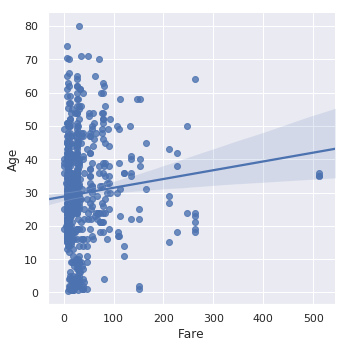

In [23]:
sns.lmplot(x="Fare", y="Age", data=titanic_df)

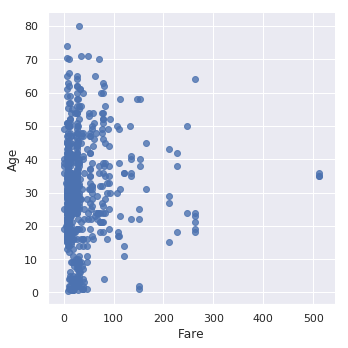

In [24]:
sns.lmplot(x="Fare", y="Age", fit_reg=False, data=titanic_df)

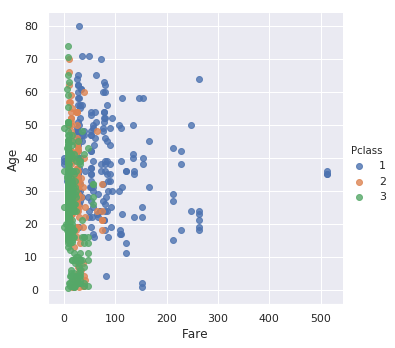

In [25]:
sns.lmplot(x="Fare", y="Age", fit_reg=False, hue="Pclass", data=titanic_df)

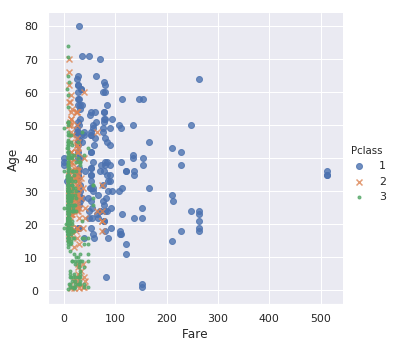

In [26]:
sns.lmplot(x="Fare", y="Age", fit_reg=False, hue="Pclass", markers=['o', 'x', '.'], data=titanic_df)

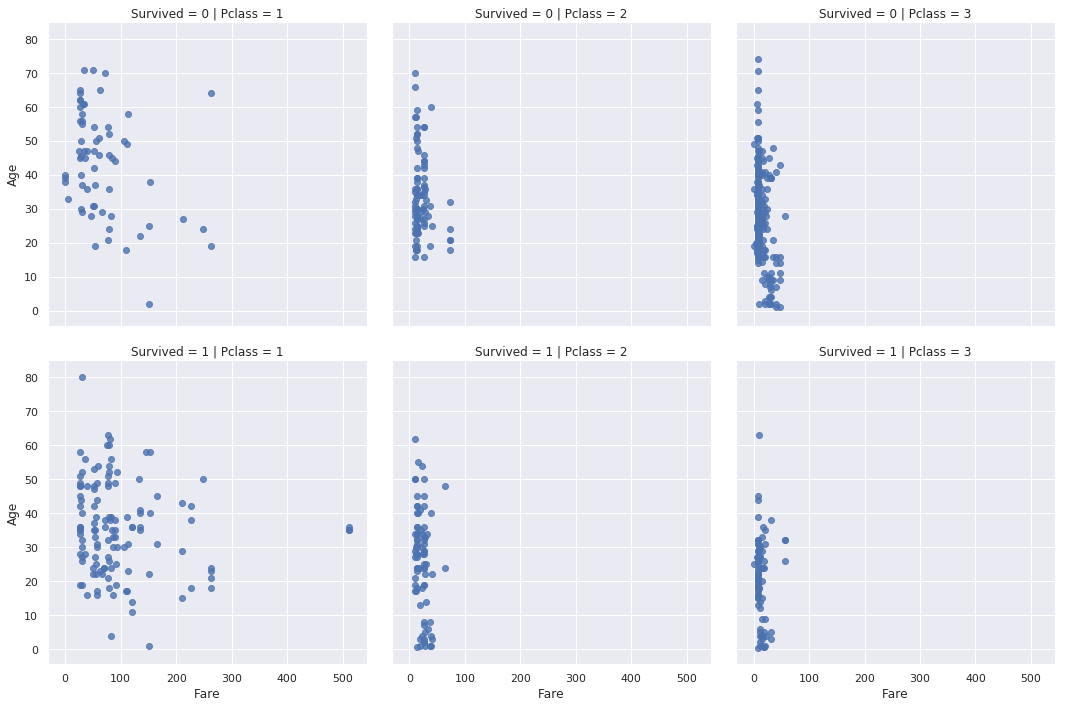

In [40]:
sns.lmplot(x="Fare", y="Age", fit_reg=False, col="Pclass", row="Survived", data=titanic_df)

### Two Variables: continues and discrete

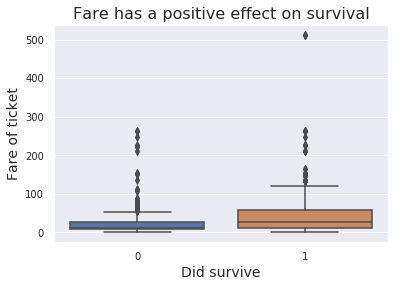

In [72]:
bplot = sns.boxplot(x="Survived", y="Fare", data=titanic_df)
bplot.axes.set_title("Fare has a positive effect on survival",
                    fontsize=16)
bplot.set_xlabel("Did survive", 
                fontsize=14)
 
bplot.set_ylabel("Fare of ticket",
                fontsize=14)
bplot.tick_params(labelsize=10)

### Two Variables: discrete and discrete

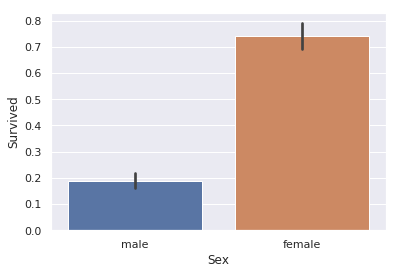

In [60]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)

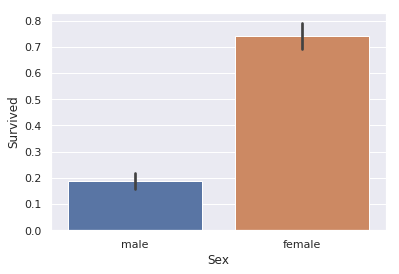

In [66]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)

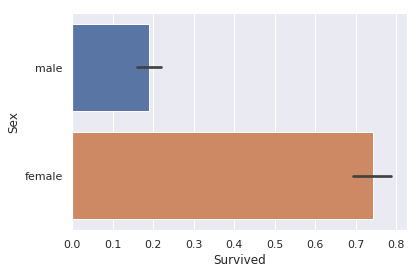

In [67]:
sns.barplot(x="Survived", y="Sex", data=titanic_df)

In [ ]:
grouped = titanic_df.groupby(['Year', 'ageGrp'], as_index=True)
final = grouped.agg(np.sum).dropna()
print(final)